In [1]:
import pandas as pd
df=pd.read_csv("/content/archive.zip")
print(df)

            Date  Person_ID  Age  Gender  Sleep Start Time  Sleep End Time  \
0     2024-04-12       1860   32   Other             23.33            4.61   
1     2024-11-04       1769   41  Female             21.02            2.43   
2     2024-08-31       2528   20    Male             22.10            3.45   
3     2024-02-22       8041   37   Other             23.10            6.65   
4     2024-02-23       4843   46   Other             21.42            4.17   
...          ...        ...  ...     ...               ...             ...   
4995  2024-01-03       5192   38  Female             22.78            4.15   
4996  2024-06-02       7134   55    Male             21.48            5.39   
4997  2024-08-13       6265   44  Female             22.02            2.82   
4998  2024-12-26       4205   55   Other             23.47            7.87   
4999  2024-04-11       2304   58    Male             20.72            1.37   

      Total Sleep Hours  Sleep Quality  Exercise (mins/day)  \


In [2]:

if 'Date' in df.columns:
    df=df.drop('Date',axis=1)
else:
    print("Column 'Date' not found in DataFrame")

df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1, 'Other': 2})

print(df)

      Person_ID  Age  Gender  Sleep Start Time  Sleep End Time  \
0          1860   32       2             23.33            4.61   
1          1769   41       1             21.02            2.43   
2          2528   20       0             22.10            3.45   
3          8041   37       2             23.10            6.65   
4          4843   46       2             21.42            4.17   
...         ...  ...     ...               ...             ...   
4995       5192   38       1             22.78            4.15   
4996       7134   55       0             21.48            5.39   
4997       6265   44       1             22.02            2.82   
4998       4205   55       2             23.47            7.87   
4999       2304   58       0             20.72            1.37   

      Total Sleep Hours  Sleep Quality  Exercise (mins/day)  \
0                  5.28              3                   86   
1                  5.41              5                   32   
2                 

In [4]:
# Calculate kurtosis for each numerical column
from scipy.stats import kurtosis
kurtosis_values = df.select_dtypes(include=['number']).apply(kurtosis, fisher=False)  # Fisher=False gives Pearson's kurtosis

print("Kurtosis of numerical columns:\n", kurtosis_values)


Kurtosis of numerical columns:
 Person_ID                        1.805832
Age                              1.785669
Gender                           1.505978
Sleep Start Time                 1.792433
Sleep End Time                   2.370673
Total Sleep Hours                1.789787
Sleep Quality                    1.788922
Exercise (mins/day)              1.812833
Caffeine Intake (mg)             1.821805
Screen Time Before Bed (mins)    1.798074
Work Hours (hrs/day)             1.833897
Productivity Score               1.751056
Mood Score                       1.802790
Stress Level                     1.762240
dtype: float64


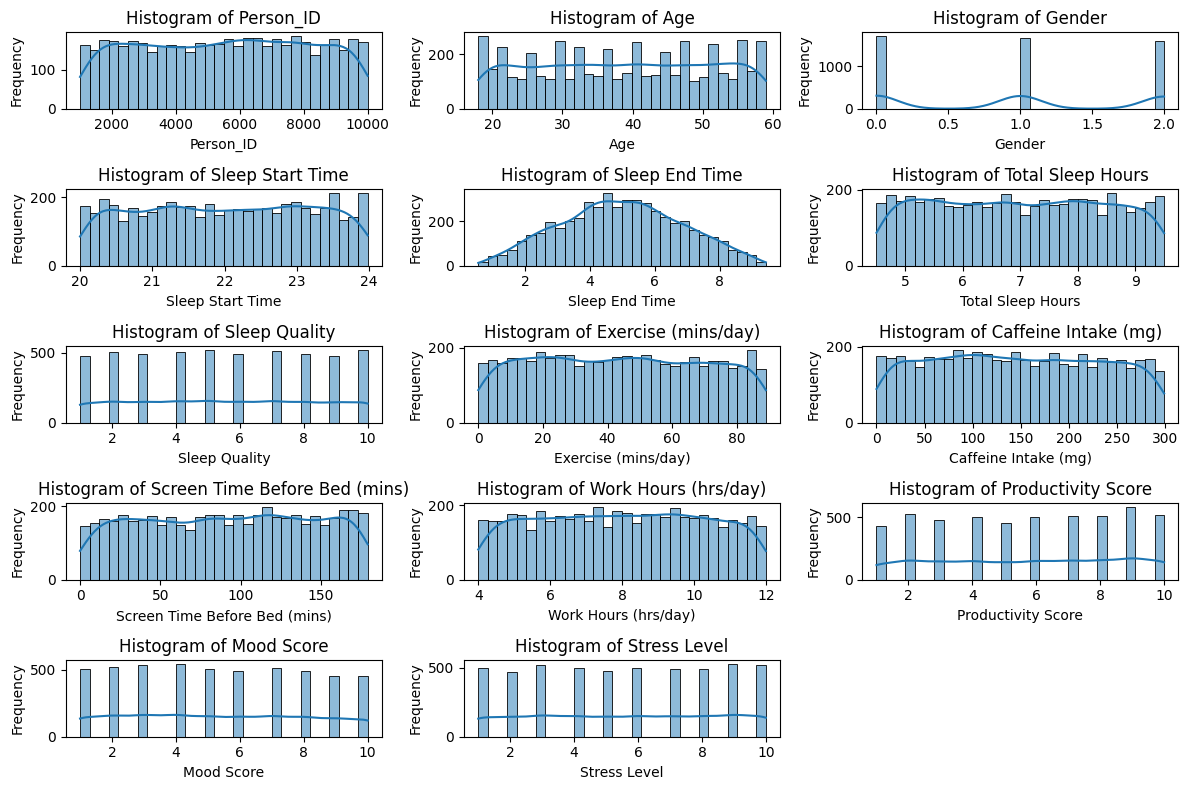

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis

# Plot histograms for all numerical columns
num_cols = df.select_dtypes(include=['number']).columns

plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols) // 3 + 1, 3, i)  # Adjust layout for multiple plots
    sns.histplot(df[col], bins=30, kde=True)  # Histogram with Kernel Density Estimation
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


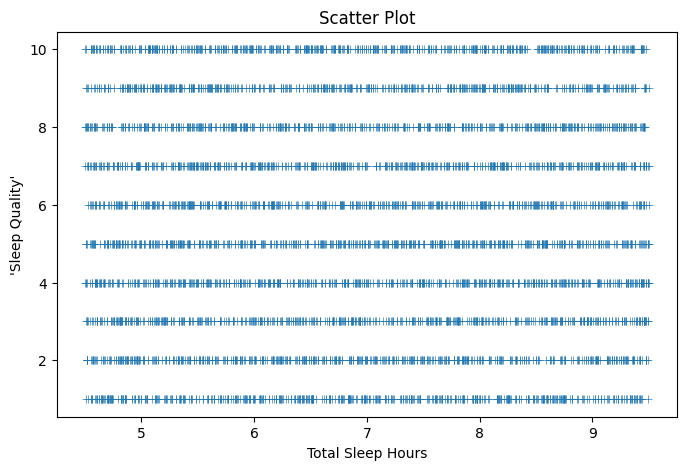

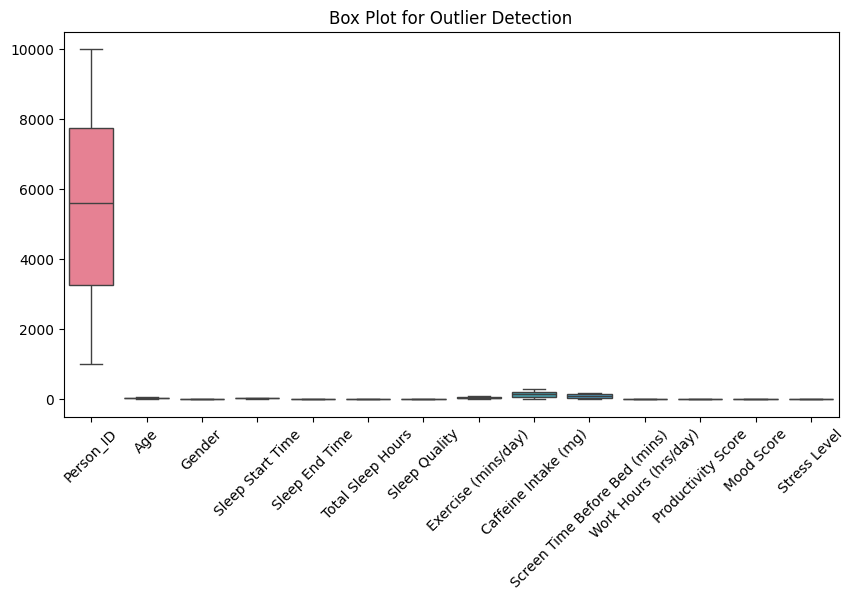

In [6]:
# Step 4: Scatter plot (Choose two numerical columns for visualization)
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Total Sleep Hours'], y=df['Sleep Quality'],marker='+')  # Replace with actual numerical column names
plt.title("Scatter Plot")
plt.xlabel("Total Sleep Hours")
plt.ylabel("'Sleep Quality'")
plt.show()

# Step 5: Box plot to detect outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=df)
plt.title("Box Plot for Outlier Detection")
plt.xticks(rotation=45)
plt.show()


In [7]:
df = df.dropna()

x = df.drop(columns=['Productivity Score'])
y = df['Productivity Score']

In [ ]:
from sklearn.linear_model import LinearRegression # import Linear Regression
from sklearn.ensemble import RandomForestRegressor # import RandomForestRegressor
from sklearn.metrics import mean_squared_error # import mean_squared_error

# Split data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

lr = LinearRegression()
rf = RandomForestRegressor(n_estimators=100, random_state=42)

lr.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Step 8: Predictions
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)

# Step 9: Evaluation
mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print(f"Linear Regression MSE: {mse_lr}")
print(f"Random Forest MSE: {mse_rf}")


Linear Regression MSE: 8.257980385730272
Random Forest MSE: 8.640744182621502


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

# Splitting features (X) and target (y)
X = df.drop(columns=['Productivity Score'])  # Assuming 'Target' is the column to predict
y = df['Productivity Score']

# Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Compute Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"logistic regression MSE: {mse}")


logistic regression MSE: 16.903


In [8]:
import numpy as np
from scipy.stats import zscore

# Step 10: Compute Z-scores and filter out outliers (Z > 3)
z_scores = np.abs(zscore(df.select_dtypes(include=np.number)))  # Only numerical columns
df_cleaned = df[(z_scores < 3).all(axis=1)]  # Keep rows with Z-score < 3

print("Data after removing outliers:\n", df_cleaned.shape)


Data after removing outliers:
 (5000, 14)


In [12]:
# Step 11: Splitting dataset again after removing outliers
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression # import LinearRegression - Add this line
from sklearn.ensemble import RandomForestRegressor # import RandomForestRegressor - Add this line
from sklearn.metrics import mean_squared_error # import mean_squared_error - Add this line to fix the error

X_clean = df_cleaned.drop(columns=['Productivity Score'])  # Replace 'Target' with actual column name
y_clean = df_cleaned['Productivity Score']  # Replace 'Target' with actual column name

X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

# Step 12: Retrain models
lr = LinearRegression() # Initialize lr again - Add this line
rf = RandomForestRegressor(n_estimators=100, random_state=42) # Initialize rf again - Add this line

lr.fit(X_train_clean, y_train_clean)
rf.fit(X_train_clean, y_train_clean)

# Step 13: New Predictions
y_pred_lr_clean = lr.predict(X_test_clean)
y_pred_rf_clean = rf.predict(X_test_clean)

# Step 14: New Evaluation
mse_lr_clean = mean_squared_error(y_test_clean, y_pred_lr_clean)
mse_rf_clean = mean_squared_error(y_test_clean, y_pred_rf_clean)

print(f"Linear Regression MSE (after outlier removal): {mse_lr_clean}")
print(f"Random Forest MSE (after outlier removal): {mse_rf_clean}")

Linear Regression MSE (after outlier removal): 8.123116361140204
Random Forest MSE (after outlier removal): 8.4965331


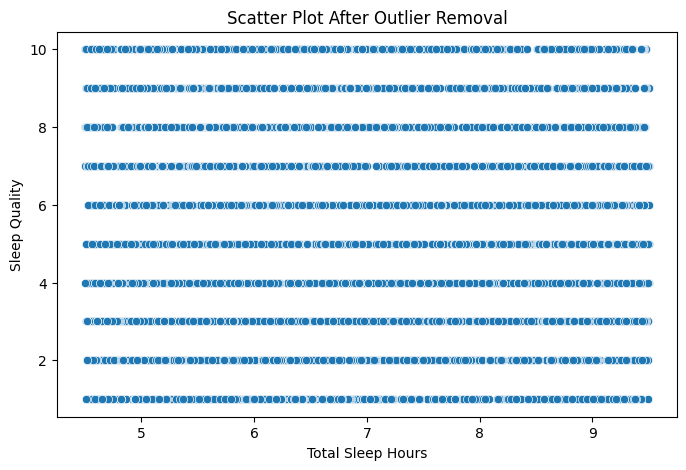

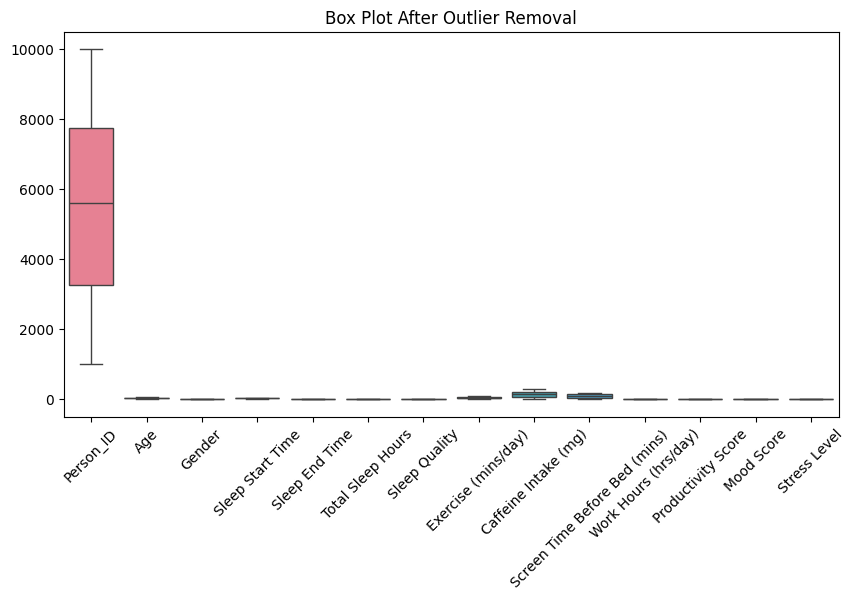

In [13]:
# Scatter plot after cleaning
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_cleaned['Total Sleep Hours'], y=df_cleaned['Sleep Quality'])  # Replace with actual columns
plt.title("Scatter Plot After Outlier Removal")
plt.xlabel("Total Sleep Hours")
plt.ylabel("Sleep Quality")
plt.show()

# Box plot after cleaning
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_cleaned)
plt.title("Box Plot After Outlier Removal")
plt.xticks(rotation=45)
plt.show()
